In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
image_dir = Path('PetImages')

In [3]:
filepaths = list(image_dir.glob(r'**/*.PNG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [4]:
image_df

,Filepath,Label
0,PetImages\Cat\100.png,Cat
1,PetImages\Cat\1000.png,Cat
2,PetImages\Cat\10000.png,Cat
3,PetImages\Cat\10001.png,Cat
4,PetImages\Cat\10002.png,Cat
...,...,...
24933,PetImages\Dog\9995.png,Dog
24934,PetImages\Dog\9996.png,Dog
24935,PetImages\Dog\9997.png,Dog
24936,PetImages\Dog\9998.png,Dog


In [5]:
train_df, test_df = train_test_split(image_df, train_size=0.80, shuffle=True, random_state=1)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                   x_col='Filepath',
                                                   y_col='Label',
                                                   target_size=(64, 64),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=42,
                                                   subset='training')

val_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_images = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False)

Found 15960 validated image filenames belonging to 2 classes.
Found 3990 validated image filenames belonging to 2 classes.
Found 4988 validated image filenames belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

def create_model(input_shape, num_classes):
    model = Sequential()

    # Mixed-Scale Dense Convolution Layer
    model.add(Conv2D(input_shape=(64,64,3), filters=16, kernel_size=(3, 3), activation="relu"))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Self-Attention Mechanism
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Hierarchical Feature Fusion
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Attention-Based Contextual Information
    model.add(Flatten())
    model.add(Dense(units=64, activation="relu"))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Dense(units=1, activation="sigmoid"))

    return model

In [9]:
# Create the model
model = create_model((64,64,3), 1)

In [ ]:
#model.summary()

In [10]:
#Our Compiler
model.compile(optimizer = 'SGD',
           loss = 'binary_crossentropy',
           metrics = ['accuracy'])

In [11]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/50
499/499 [==============================] - 147s 294ms/step - loss: 0.6923 - accuracy: 0.5156 - val_loss: 0.6913 - val_accuracy: 0.4982 - lr: 0.0100
Epoch 2/50
499/499 [==============================] - 95s 191ms/step - loss: 0.6890 - accuracy: 0.5469 - val_loss: 0.6876 - val_accuracy: 0.5404 - lr: 0.0100
Epoch 3/50
499/499 [==============================] - 95s 191ms/step - loss: 0.6845 - accuracy: 0.5712 - val_loss: 0.6819 - val_accuracy: 0.5406 - lr: 0.0100
Epoch 4/50
499/499 [==============================] - 96s 193ms/step - loss: 0.6760 - accuracy: 0.5859 - val_loss: 0.6650 - val_accuracy: 0.6241 - lr: 0.0100
Epoch 5/50
499/499 [==============================] - 96s 192ms/step - loss: 0.6659 - accuracy: 0.5994 - val_loss: 0.6566 - val_accuracy: 0.6261 - lr: 0.0100
Epoch 6/50
499/499 [==============================] - 96s 192ms/step - loss: 0.6579 - accuracy: 0.6075 - val_loss: 0.6524 - val_accuracy: 0.6085 - lr: 0.0100
Epoch 7/50
499/499 [==============================]

In [ ]:
#test_images = test_generator.flow_from_directory("New folder/Test",
#                                                 target_size=(64, 64),
#                                                 color_mode='rgb',
#                                                 class_mode='binary',
#                                                 batch_size=32,
#                                                 shuffle=False)

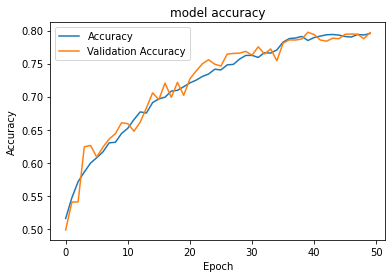

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()

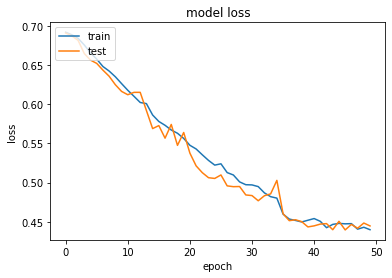

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.40105
Test Accuracy: 82.42%


156/156 [==============================] - 17s 106ms/step


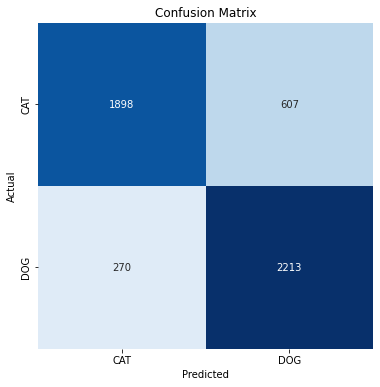

Classification Report:
----------------------
               precision    recall  f1-score   support

  CHICKENPOX       0.88      0.76      0.81      2505
   MONKEYPOX       0.78      0.89      0.83      2483

    accuracy                           0.82      4988
   macro avg       0.83      0.82      0.82      4988
weighted avg       0.83      0.82      0.82      4988



In [15]:
predictions = (model.predict(test_images) >= 0.5).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CHICKENPOX", "MONKEYPOX"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)